In [1]:
import pandas as pd

data_df = pd.read_csv('c3_poly_data-1.csv')
data_df.head()

,x,y
0,0.375,-0.027
1,0.951,0.378
2,0.732,0.174
3,0.599,0.049
4,0.156,-0.423


In [2]:
x = data_df.x.values
y = data_df.y.values

print("Type of x and y:", type(x), type(y))

Type of x and y: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


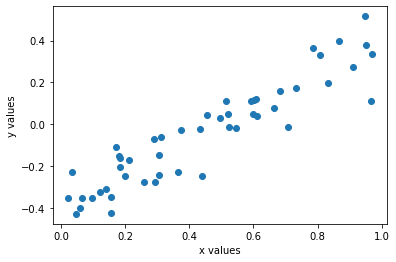

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot data points

plt.scatter(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [4]:
# clear linear trend so can plot line of best fit using numpy polyfit

import numpy as np
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(x, y, deg=1)
print("Coefficients:", coefs)

Coefficients: [-0.3904125   0.77788056]


In [5]:
# extract individual coefs

c_0, c_1 = coefs

print("c_0 (intercept):", c_0)
print("c_1 (slope)    :", c_1)

c_0 (intercept): -0.3904124988780681
c_1 (slope)    : 0.7778805590197081


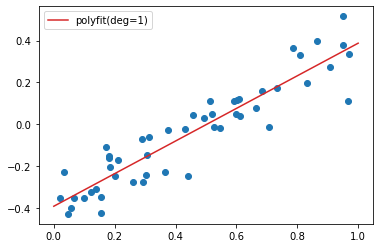

In [6]:
# plot the line by creating new values based on equation

# generate hundred values between 0 and 1

x_values = np.linspace(0, 1, num=100)

# compute associate y values

y_values = c_0 + c_1 * x_values

# plot line of best fit

plt.scatter(x, y) # plot actual data
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)") # plot prediction line 

plt.legend()
plt.show()


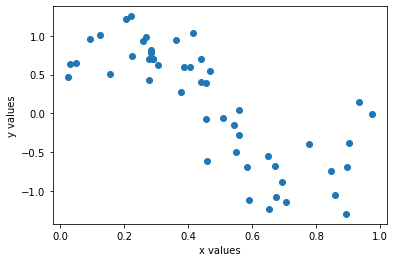

In [7]:
# load second dataset 

data_df = pd.read_csv('c3_poly_data-2.csv')
x2 = data_df.x.values
y2 = data_df.y.values

plt.scatter(x2, y2)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()


In [8]:
# fit line on above

coefs2 = poly.polyfit(x2, y2, deg=1)
print('Coefficients:', coefs2)

# generate hundred values
x_values2 = np.linspace(0, 1, num=100)

# comute associate y values
c_0, c_1 = coefs2 
y_values2 = c_0 + c_1*x_values2

Coefficients: [ 1.17807746 -2.25363975]


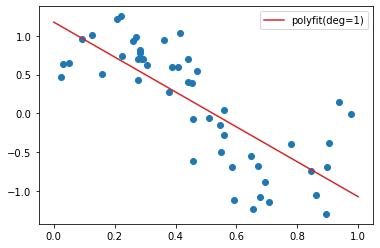

In [9]:
plt.scatter(x2, y2) # plot actual data
plt.plot(x_values2, y_values2, c="C3", label="polyfit(deg=1)") # plot prediction line 

plt.legend()
plt.show()

In [10]:
# line is too rigid to fit model so increase polynomials to 3

coefs2 = poly.polyfit(x2, y2, deg=3)
print('Coefficients:', coefs2)

Coefficients: [  0.24324604   8.92987847 -29.43676159  20.52793415]


In [11]:
c_0, c_1, c_2, c_3 = coefs2 
y_values2 = c_0 + c_1 * x_values2 + c_2 * (x_values ** 2) + c_3 * (x_values2 ** 3)

In [12]:
# as typing out above equation is complex can do directly via polyval()

# predict y values with new coefs
y_values2 = poly.polyval(x_values2, coefs2)

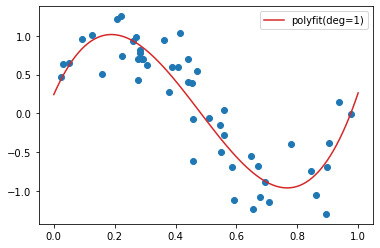

In [13]:
plt.scatter(x2, y2) # plot actual data
plt.plot(x_values2, y_values2, c="C3", label="polyfit(deg=1)") # plot prediction line 

plt.legend()
plt.show()

Summary:

polyfit() calculates coefficents of polynomial that best fits data x in to y
polyval() calculates x values based on y values and coefs. y values serve as predictions
polyfit() has parameter deg that allows to fix complexity of model

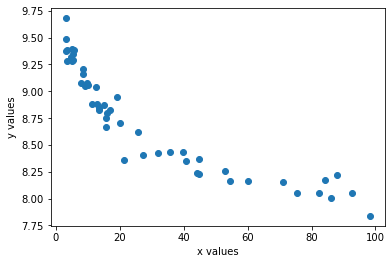

In [43]:
# load third dataset 

data_df = pd.read_csv('c3_poly_data-3.csv')
x3 = data_df.x.values
y3 = data_df.y.values

plt.scatter(x3, y3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()


In [44]:
# define function for above process

def fit(x, y, deg, xlabel, ylabel, legend):
    # Fit a polynomial
    coefs = poly.polyfit(x, y, deg=deg)

    # Generate a hundred values between min(x) and max(x)
    x_values = np.linspace(min(x), max(x), num=100)

    # Predict y values
    y_values = poly.polyval(x_values, coefs)

    # Plot curve
    plt.scatter(x, y)
    plt.plot(x_values, y_values, c="C3", label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

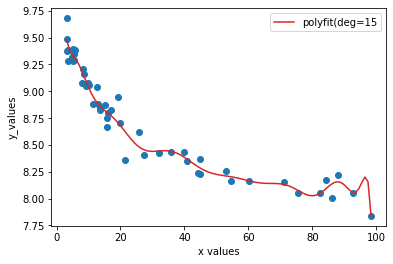

In [46]:
fit(x3, y3, 15, "x values", "y_values", "polyfit(deg=15")

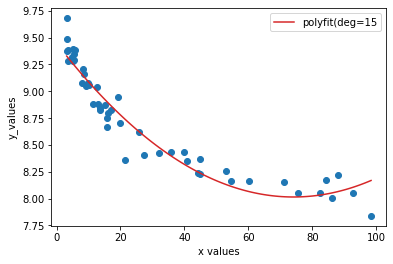

In [47]:
# to avoid overfitting use lower degree

fit(x3, y3, 2, "x values", "y_values", "polyfit(deg=15")

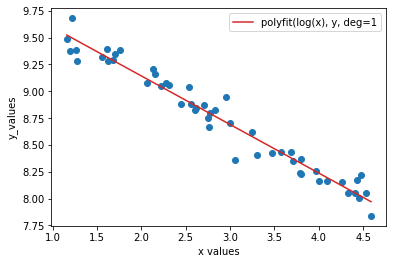

In [48]:
# apply log function

fit(np.log(x3), y3, 1, "x values", "y_values", "polyfit(log(x), y, deg=1")

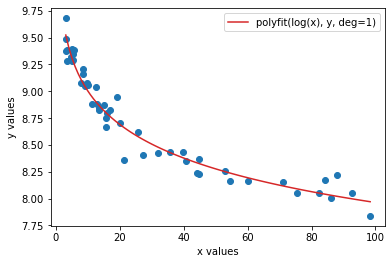

In [53]:
# plot above with original scale 

# Fit a polynomial
coefs = np.polyfit(np.log(x3), y3, deg=1)

# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(x3.min(), x3.max(), num=100)

# Predict y values
y_values = np.polyval(coefs, np.log(x_values))

# Plot curve
plt.scatter(x3, y3)
plt.plot(x_values, y_values, c='C3', label='polyfit(log(x), y, deg=1)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()